In [ ]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
num_classes = 10
classes = {0:"airplane", 1:"automobile", 2:"bird",3:"cat", 4:"deer",\
           5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
y_train_onehot = to_categorical(y_train, num_classes) 

x_test = x_test.astype('float32')/255
y_test_onehot = to_categorical(y_test, num_classes) 

print('x_train shape:', x_train.shape)
print('y_train shape', y_train.shape)
print('y_train_onehot shape:', y_train_onehot.shape)
print('x_test shape:', x_test.shape)
print('y_train shape', y_test.shape)
print('y_test_onehot shape:', y_test_onehot.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape (50000, 1)
y_train_onehot shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_train shape (10000, 1)
y_test_onehot shape: (10000, 10)


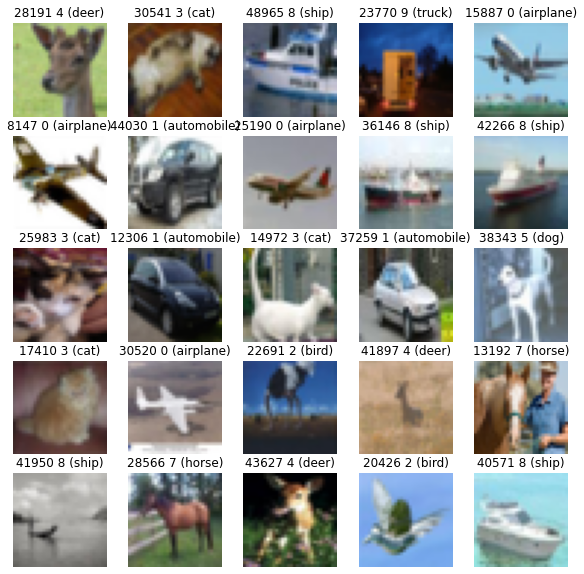

In [ ]:
pltsize=2
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, x_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(x_train[i_rand])
    plt.title(str(i_rand) + " " + str(y_train[i_rand][0])\
              + " (" + classes[y_train[i_rand][0]] + ")")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#with feedforward NN

#to flatten all the data
import numpy as np
dim_data = np.prod(x_train.shape[1:])
# print(dim_data)
flatten_x_train = x_train.reshape(x_train.shape[0], dim_data)
flatten_x_test = x_test.reshape(x_test.shape[0], dim_data)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
h = model.fit(flatten_x_train, y_train_onehot, batch_size=256, epochs=50, verbose=1, validation_data=(flatten_x_test, y_test_onehot))

# I think we are experiencing an overfitting situation

Epoch 1/50
196/196 [==============================] - 2s 7ms/step - loss: 2.4333 - accuracy: 0.1515 - val_loss: 1.9493 - val_accuracy: 0.2873
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9585 - accuracy: 0.2867 - val_loss: 1.8449 - val_accuracy: 0.3348
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8483 - accuracy: 0.3312 - val_loss: 1.8190 - val_accuracy: 0.3399
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7740 - accuracy: 0.3588 - val_loss: 1.9152 - val_accuracy: 0.3282
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7154 - accuracy: 0.3810 - val_loss: 1.6930 - val_accuracy: 0.3954
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6629 - accuracy: 0.4058 - val_loss: 1.8152 - val_accuracy: 0.3667
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5993 - accuracy: 0.4293 - val_loss: 1.6614 - val_accuracy: 0.4179
Epoch 

313/313 [==============================] - 1s 2ms/step - loss: 2.8871 - accuracy: 0.4618
Evaluation result on Test Data : Loss = 2.887120246887207, accuracy = 0.4618000090122223


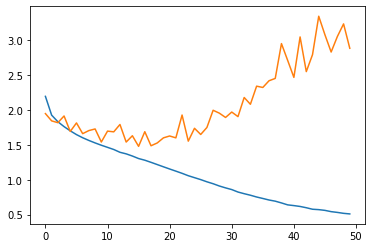

In [ ]:
[test_loss, test_acc] = model.evaluate(flatten_x_test, y_test_onehot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()

In [ ]:
#Now with convolutional NN

from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:])) # input_shape = (32,32,3)
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
h = model.fit(x_train, y_train_onehot, batch_size=256, epochs=50, verbose=1, validation_data=(x_test, y_test_onehot))

Epoch 1/50
196/196 [==============================] - 5s 21ms/step - loss: 2.1404 - accuracy: 0.1998 - val_loss: 1.6356 - val_accuracy: 0.3867
Epoch 2/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6776 - accuracy: 0.3947 - val_loss: 1.4185 - val_accuracy: 0.4778
Epoch 3/50
196/196 [==============================] - 4s 19ms/step - loss: 1.4742 - accuracy: 0.4718 - val_loss: 1.3080 - val_accuracy: 0.5354
Epoch 4/50
196/196 [==============================] - 4s 19ms/step - loss: 1.3195 - accuracy: 0.5277 - val_loss: 1.1161 - val_accuracy: 0.6078
Epoch 5/50
196/196 [==============================] - 4s 19ms/step - loss: 1.1957 - accuracy: 0.5817 - val_loss: 1.1581 - val_accuracy: 0.5887
Epoch 6/50
196/196 [==============================] - 4s 19ms/step - loss: 1.0973 - accuracy: 0.6097 - val_loss: 1.0279 - val_accuracy: 0.6542
Epoch 7/50
196/196 [==============================] - 4s 19ms/step - loss: 1.0205 - accuracy: 0.6411 - val_loss: 1.0547 - val_accuracy: 0.6232

In [ ]:
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)      

313/313 [==============================] - 1s 3ms/step - loss: 0.6336 - accuracy: 0.7944
Evaluation result on Test Data : Loss = 0.6336401700973511, accuracy = 0.7943999767303467


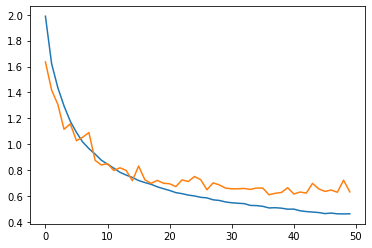

In [ ]:
[test_loss, test_acc] = model.evaluate(x_test, y_test_onehot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()